## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, power_transform, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
from category_encoders import BinaryEncoder

### Getting the dataset

In [2]:
dataset = pd.read_csv(r'C:\Users\LENOVO\Documents\Post Graduation\data sets\WA_Fn-UseC_-HR-Employee-Attrition.csv')
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Converting the target column to numeric

In [3]:
dataset['Attrition'] = np.where(dataset['Attrition']== 'Yes',1,0)

### Checking for null values and there are no null values found on this dataset

In [4]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Checking for the datatypes

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int32
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome          

### Checking the value counts to determine the best encoding technique on each categorical column

In [6]:
dataset['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [7]:
dataset['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [8]:
dataset['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [9]:
dataset['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [10]:
dataset['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [11]:
dataset['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [12]:
dataset['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [13]:
dataset['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

## Dropping the column Over18 because it consists of only one category and we will not be able to get any inputs from it

In [14]:
dataset = dataset.drop(columns = 'Over18')

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int32
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome          

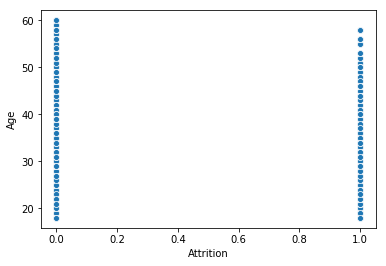

In [16]:
sns.scatterplot(x= 'Attrition',y='Age',data = dataset)

### We can see that the attrition is not dependent on Age, however I can see the attrition decrease when age crosses 55 years

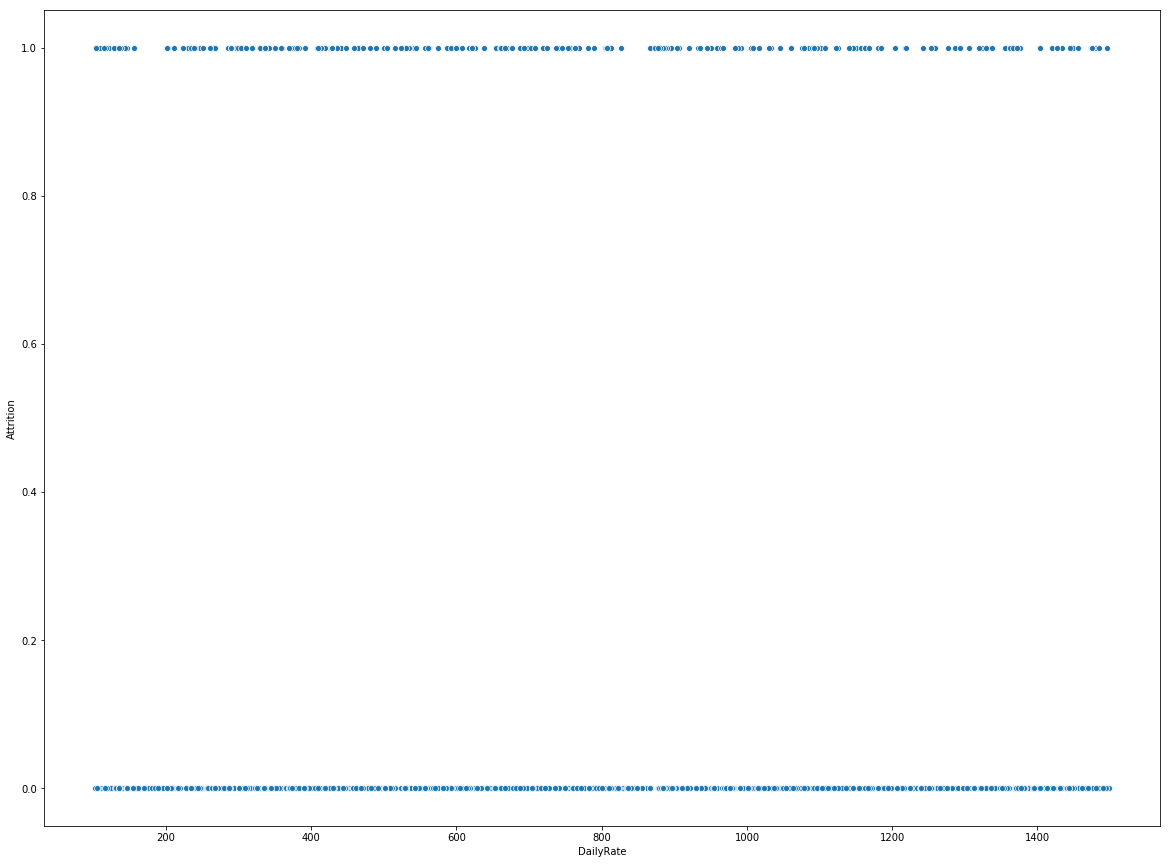

In [17]:
plt.figure(figsize = (20,15))
sns.scatterplot(x= 'DailyRate',y='Attrition',data = dataset)

### Attrition is independent of Dailyrate

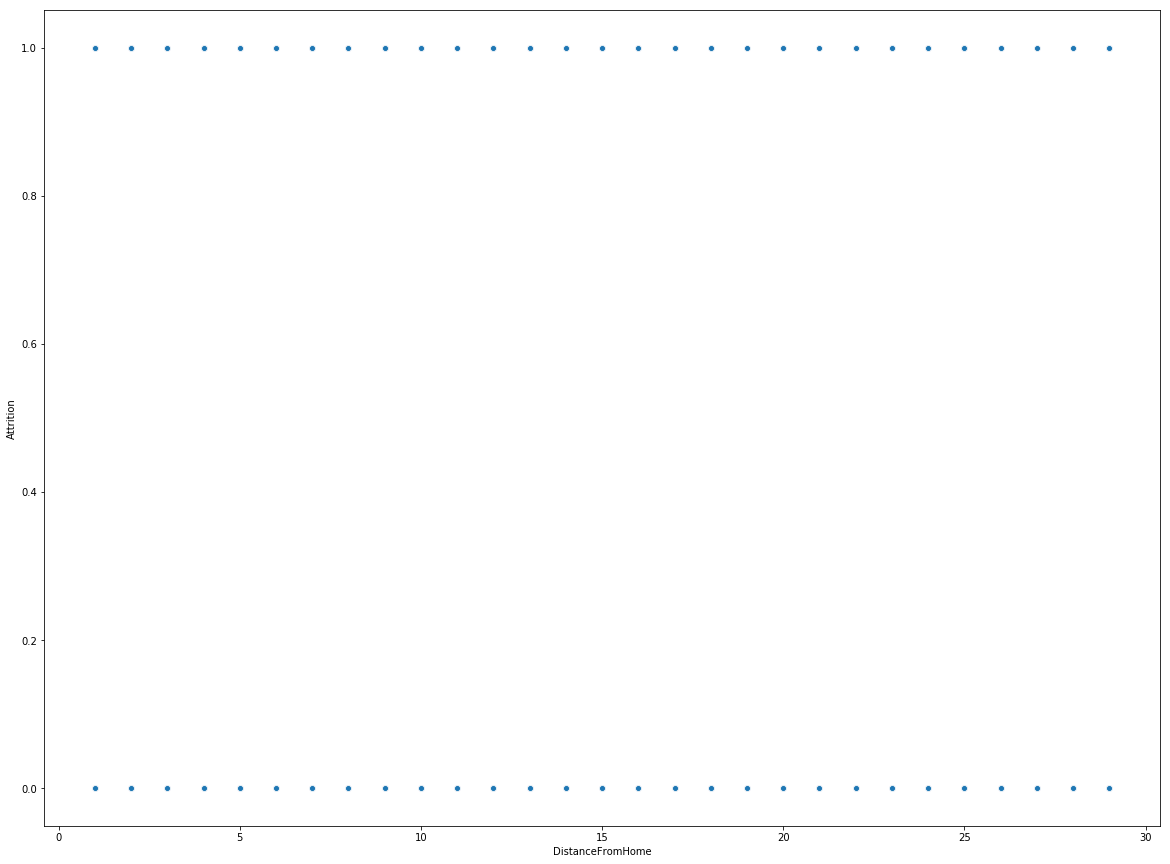

In [18]:
plt.figure(figsize = (20,15))
sns.scatterplot(x= 'DistanceFromHome',y='Attrition',data = dataset)

### Attrition is independent of workplace distance from Home

In [19]:
cross = pd.crosstab(index = dataset['Education'],columns =dataset['Attrition'])
cross

Attrition,0,1
Education,,
1,139,31
2,238,44
3,473,99
4,340,58
5,43,5


### Let's get the proprtion to understand the column better

In [24]:
education_effect = pd.DataFrame(cross)
education_effect['proportion'] = (education_effect[1]/(education_effect[0]+education_effect[1]))*100
education_effect

Attrition,0,1,proportion
Education,,,
1,139,31,18.235294
2,238,44,15.602837
3,473,99,17.307692
4,340,58,14.572864
5,43,5,10.416667


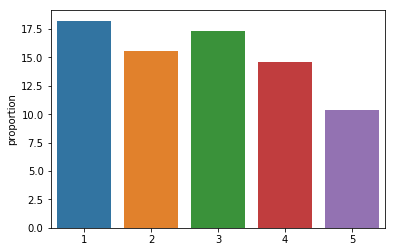

In [25]:
sns.barplot(x = [1,2,3,4,5],y='proportion',data = education_effect)

### we can see that the education level 1 had highest proportion os employee attrition and education level 5 had lowest proportion

## We can also drop EmployeeCount and EmployeeNumber columns because EmployeeCount contains only one number ('1') and it will not affect the Attrition rate and the EmployeeNumber is unique to each row

In [26]:
dataset = dataset.drop(columns = ['EmployeeCount','EmployeeNumber'])

KeyError: "['EmployeeCount' 'EmployeeNumber'] not found in axis"

In [28]:
cross1 = pd.crosstab(index = dataset['BusinessTravel'], columns = dataset['Attrition'])
buss = pd.DataFrame(cross1)
buss['Attr'] = (buss[1]/(buss[0]+buss[1]))*100
buss

Attrition,0,1,Attr
BusinessTravel,,,
Non-Travel,138,12,8.000000
Travel_Frequently,208,69,24.909747
Travel_Rarely,887,156,14.956855


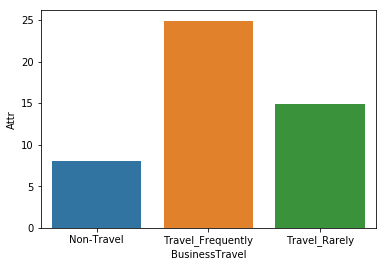

In [30]:
sns.barplot(x = buss.index, y = buss['Attr'])

### Upon review, I can see that the people who travels a lot has high attrition rate when compared to non travelling employees

In [32]:
cross2 = pd.crosstab(index = dataset['Department'], columns = dataset['Attrition'])
dept = pd.DataFrame(cross2)
dept['Attr'] = (dept[1]/(dept[0]+dept[1]))*100
dept

Attrition,0,1,Attr
Department,,,
Human Resources,51,12,19.047619
Research & Development,828,133,13.839750
Sales,354,92,20.627803


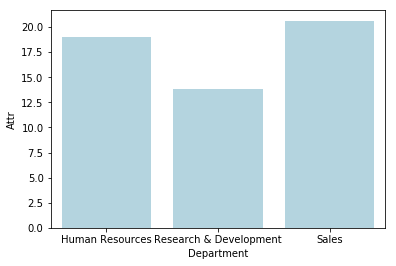

In [34]:
sns.barplot(color='lightblue',x = dept.index, y= dept['Attr'])

#### Upon reviewing, I can see that the Sales department has highest attrition rate when compared to others

In [35]:
cross3 = pd.crosstab(index = dataset['EducationField'], columns = dataset['Attrition'])
edu = pd.DataFrame(cross3)
edu['Attr'] = (edu[1]/(edu[0]+edu[1]))*100
edu

Attrition,0,1,Attr
EducationField,,,
Human Resources,20,7,25.925926
Life Sciences,517,89,14.686469
Marketing,124,35,22.012579
Medical,401,63,13.577586
Other,71,11,13.414634
Technical Degree,100,32,24.242424


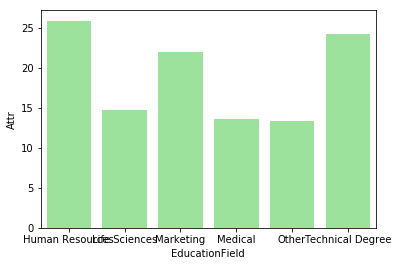

In [36]:
sns.barplot(x = edu.index, y = edu['Attr'], color = 'lightgreen')

### Upon reviewing, we can see that Human Resources and technical Degree education fields contribute to the highest attribution levels

In [37]:
cross4 = pd.crosstab(index = dataset['EnvironmentSatisfaction'], columns = dataset['Attrition'])
env = pd.DataFrame(cross4)
env['Attr'] = (env[1]/(env[0]+env[1]))*100
env

Attrition,0,1,Attr
EnvironmentSatisfaction,,,
1,212,72,25.352113
2,244,43,14.982578
3,391,62,13.686534
4,386,60,13.452915


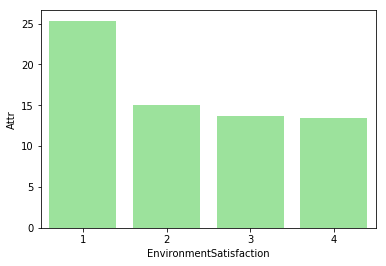

In [38]:
sns.barplot(x = env.index,y = env['Attr'], color = 'lightgreen')

### We can see from the above graph that the attrition level is directly proportional to the satisfaction levels

In [39]:
cross5 = pd.crosstab(index = dataset['Gender'], columns = dataset['Attrition'])
gen = pd.DataFrame(cross5)
gen['Attr'] = (gen[1]/(gen[0]+gen[1]))*100
gen

Attrition,0,1,Attr
Gender,,,
Female,501,87,14.795918
Male,732,150,17.006803


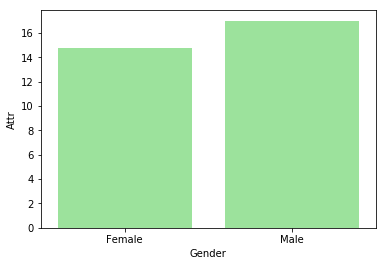

In [40]:
sns.barplot(x = gen.index, y = gen['Attr'], color = 'lightgreen')

### Upon reviewing we can see that male has highest attrition levels compared to female employees

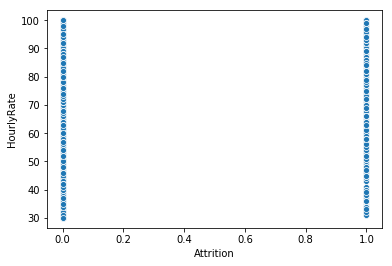

In [41]:
sns.scatterplot(x = 'Attrition',y= 'HourlyRate', data = dataset)

### There is Attrition at every houry rate

In [42]:
cross6 = pd.crosstab(index = dataset['JobInvolvement'], columns = dataset['Attrition'])
inv = pd.DataFrame(cross6)
inv['Attr'] = (inv[1]/(inv[0]+inv[1]))*100
inv


Attrition,0,1,Attr
JobInvolvement,,,
1,55,28,33.734940
2,304,71,18.933333
3,743,125,14.400922
4,131,13,9.027778


## using cross tab option to get more insights on proportion of categories which has attrition. you can view the same from the below figure

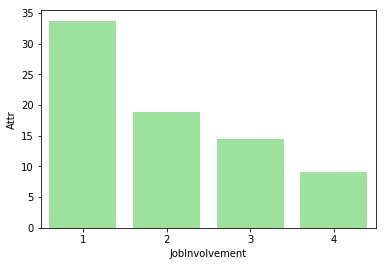

In [43]:
sns.barplot(x= inv.index, y = inv['Attr'], color = 'lightgreen')

### We can see from the above graph that high involvement rate has lower attrition levels and viceversa

In [45]:
cross7 = pd.crosstab(index = dataset['JobLevel'], columns = dataset['Attrition'])
lev = pd.DataFrame(cross7)
lev['Attr'] = (lev[1]/(lev[0]+lev[1]))*100
lev

Attrition,0,1,Attr
JobLevel,,,
1,400,143,26.335175
2,482,52,9.737828
3,186,32,14.678899
4,101,5,4.716981
5,64,5,7.246377


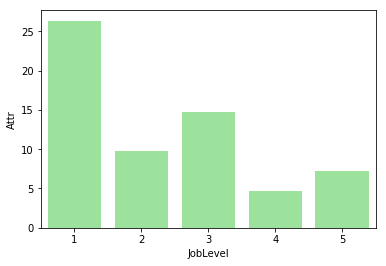

In [46]:
sns.barplot(x=lev.index, y = lev['Attr'], color = 'lightgreen')

### We can see that Job level 1 has highest attrition rate and the level 4 has lower attrition rate, we also can see the decrease in attrition rate with the increase in joblevels

In [47]:
cross8 = pd.crosstab(index = dataset['JobRole'], columns = dataset['Attrition'])
rol = pd.DataFrame(cross8)
rol['Attr'] = (rol[1]/(rol[0]+rol[1]))*100
rol

Attrition,0,1,Attr
JobRole,,,
Healthcare Representative,122,9,6.870229
Human Resources,40,12,23.076923
Laboratory Technician,197,62,23.938224
Manager,97,5,4.901961
Manufacturing Director,135,10,6.896552
Research Director,78,2,2.500000
Research Scientist,245,47,16.095890
Sales Executive,269,57,17.484663
Sales Representative,50,33,39.759036


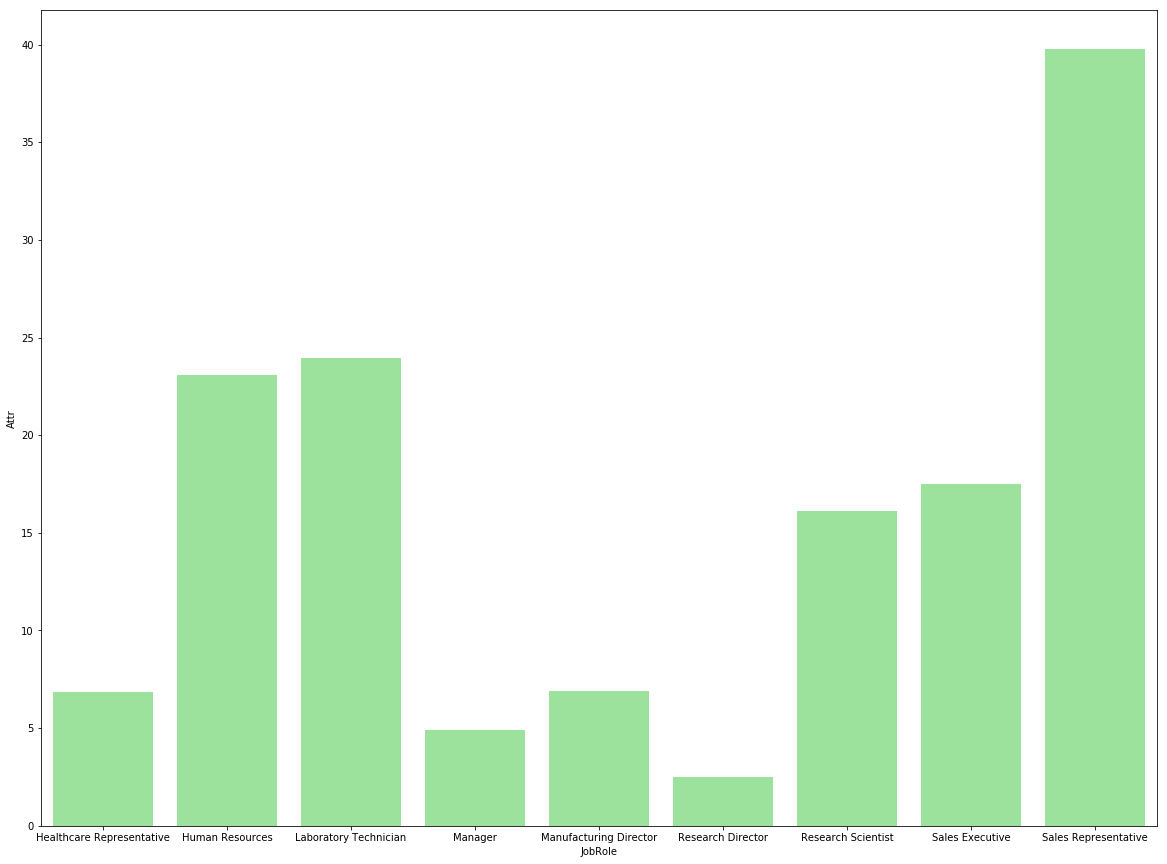

In [50]:
plt.figure(figsize = (20,15))
sns.barplot(x = rol.index, y = rol['Attr'], color = 'lightgreen')

### Upon reviewing the job Role column, I can see that the Sales Representative has highest attrition rates, followed by Human Resource and laboratory technician

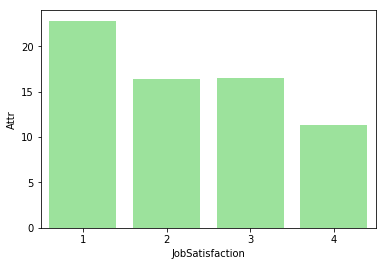

In [53]:
cross9 = pd.crosstab(index = dataset['JobSatisfaction'], columns = dataset['Attrition'])
sat = pd.DataFrame(cross9)
sat['Attr'] = (sat[1]/(sat[0]+sat[1]))*100
sns.barplot(x = sat.index, y = sat['Attr'], color = 'lightgreen')


### We can see that the lower the satisfaction, higher the Attrition rate and vice versa

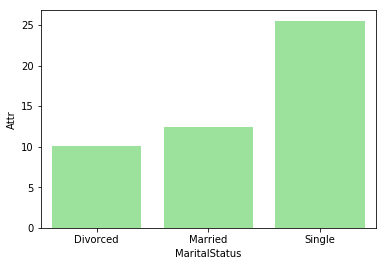

In [54]:
cross10 = pd.crosstab(index = dataset['MaritalStatus'], columns = dataset['Attrition'])
mar = pd.DataFrame(cross10)
mar['Attr'] = (mar[1]/(mar[0]+mar[1]))*100
sns.barplot(x = mar.index, y = mar['Attr'], color = 'lightgreen')

### Upon reviewing, we can see that un-married employees have highest Attrition rates when compared to married and divorced

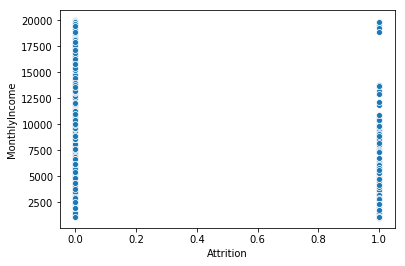

In [55]:
sns.scatterplot(x = 'Attrition', y ='MonthlyIncome', data = dataset)

### Attrition rate is dependent on the monthly income, higher the monthly income, lesser the Attrition

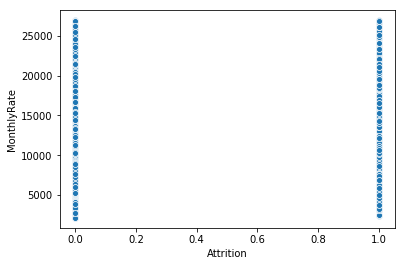

In [56]:
sns.scatterplot(x= 'Attrition', y = 'MonthlyRate', data = dataset)

###  Unable to find the monthly rate column's relation with Attrition, we can find the same when we check for correaltion

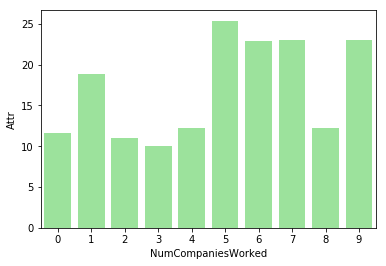

In [57]:
cross11 = pd.crosstab(index = dataset['NumCompaniesWorked'], columns = dataset['Attrition'])
num = pd.DataFrame(cross11)
num['Attr'] = (num[1]/(num[0]+num[1]))*100
sns.barplot(x = num.index, y = num['Attr'], color = 'lightgreen')

### Number of companies worked is related to attrition rate as we can see the people who worked at 5,6,7 and 9 companies has higer attrition rates

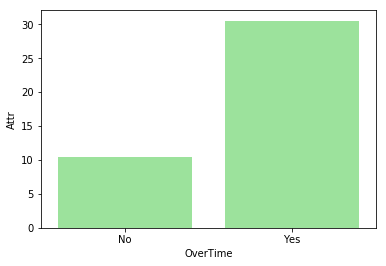

In [59]:
cross12 = pd.crosstab(index = dataset['OverTime'], columns = dataset['Attrition'])
onr = pd.DataFrame(cross12)
onr['Attr'] = (onr[1]/(onr[0]+onr[1]))*100
sns.barplot(x = onr.index, y = onr['Attr'], color = 'lightgreen')

### People who does overtime has highest attrition rates when compared to the people who don't.

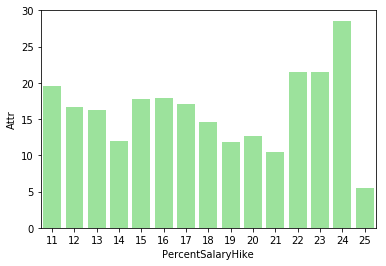

In [61]:
cross13 = pd.crosstab(index = dataset['PercentSalaryHike'], columns = dataset['Attrition'])
per = pd.DataFrame(cross13)
per['Attr'] = (per[1]/(per[0]+per[1]))*100
sns.barplot(x = per.index, y = per['Attr'], color = 'lightgreen')

### The salary hike is with 24% is the highest, followed by the hike of 22 and 23 percent

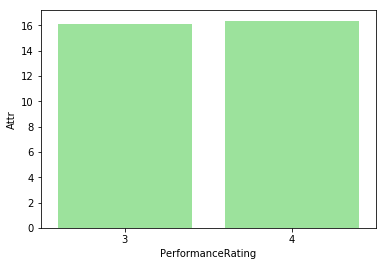

In [62]:
cross14 = pd.crosstab(index = dataset['PerformanceRating'], columns = dataset['Attrition'])
rat = pd.DataFrame(cross14)
rat['Attr'] = (rat[1]/(rat[0]+rat[1]))*100
sns.barplot(x = rat.index, y = rat['Attr'], color = 'lightgreen')


### perormance rating 4 has highest attrition rate when compared to rating 3

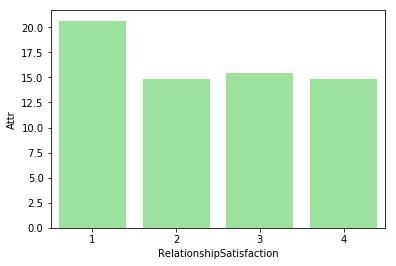

In [64]:
cross15 = pd.crosstab(index = dataset['RelationshipSatisfaction'], columns = dataset['Attrition'])
sat = pd.DataFrame(cross15)
sat['Attr'] = (sat[1]/(sat[0]+sat[1]))*100
sns.barplot(x = sat.index, y = sat['Attr'], color = 'lightgreen')

### Lower satisfaction rates have higher Attrition rate and vice versa

In [65]:
"""
YearsWithCurrManager        1470 non-null int64
"""

'\nStandardHours               1470 non-null int64\nStockOptionLevel            1470 non-null int64\nTotalWorkingYears           1470 non-null int64\nTrainingTimesLastYear       1470 non-null int64\nWorkLifeBalance             1470 non-null int64\nYearsAtCompany              1470 non-null int64\nYearsInCurrentRole          1470 non-null int64\nYearsSinceLastPromotion     1470 non-null int64\nYearsWithCurrManager        1470 non-null int64\n'

### We can also remove the standatrd hours column, because its value is 80 throughout and it won't have any effect on the attrition

In [66]:
dataset = dataset.drop(columns='StandardHours')

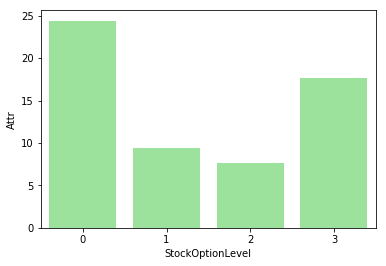

In [67]:
cross17 = pd.crosstab(index = dataset['StockOptionLevel'], columns = dataset['Attrition'])
sto = pd.DataFrame(cross17)
sto['Attr'] = (sto[1]/(sto[0]+sto[1]))*100
sns.barplot(x = sto.index, y = sto['Attr'], color = 'lightgreen')

### I can see that the stock option level 0 has highest attrition rate followed by stock option 3

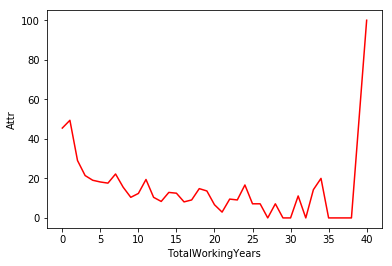

In [70]:
cross18 = pd.crosstab(index = dataset['TotalWorkingYears'], columns = dataset['Attrition'])
wor = pd.DataFrame(cross18)
wor['Attr'] = (wor[1]/(wor[0]+wor[1]))*100
sns.lineplot(x = wor.index, y = wor['Attr'], color = 'red')

### We can conclude that the attrition rate decreases with the experience, however after 40 years of experience we can say that the employee is retiring instead of Attrition

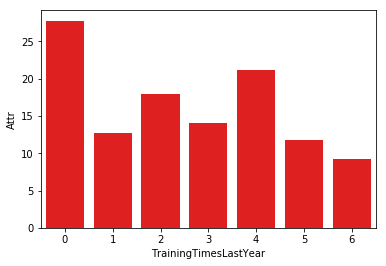

In [72]:
cross20 = pd.crosstab(index = dataset['TrainingTimesLastYear'], columns = dataset['Attrition'])
tra = pd.DataFrame(cross20)
tra['Attr'] = (tra[1]/(tra[0]+tra[1]))*100
sns.barplot(x = tra.index, y = tra['Attr'], color = 'red')

### Upon reviewing I can see that when the people are not trained, there is a higher attrition rate

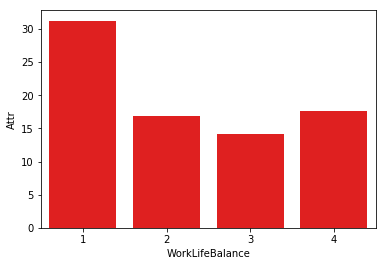

In [73]:
cross21 = pd.crosstab(index = dataset['WorkLifeBalance'], columns = dataset['Attrition'])
wor = pd.DataFrame(cross21)
wor['Attr'] = (wor[1]/(wor[0]+wor[1]))*100
sns.barplot(x = wor.index, y = wor['Attr'], color = 'red')

### Lesser the work life balance, higher the attrition rate

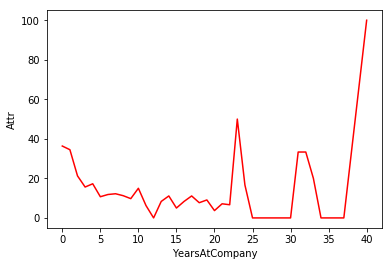

In [75]:
cross22 = pd.crosstab(index = dataset['YearsAtCompany'], columns = dataset['Attrition'])
yea = pd.DataFrame(cross22)
yea['Attr'] = (yea[1]/(yea[0]+yea[1]))*100
sns.lineplot(x = yea.index, y = yea['Attr'], color = 'red')

### The highest attrition rate is for 40 years experience(might be retirement) and the 2nd highest attrition is between 23 to 25 years

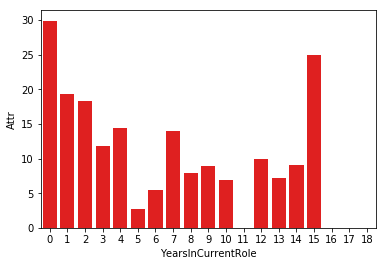

In [77]:
cross23 = pd.crosstab(index = dataset['YearsInCurrentRole'], columns = dataset['Attrition'])
yea = pd.DataFrame(cross23)
yea['Attr'] = (yea[1]/(yea[0]+yea[1]))*100
sns.barplot(x = yea.index, y = yea['Attr'], color = 'red')

### Attrition rate decreases as the number of year in the current role increases, however we can see that the 2nd highest attrition rate is for 15 years in current role

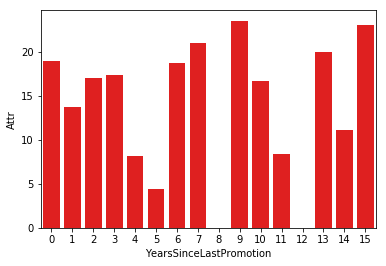

In [78]:
cross24 = pd.crosstab(index = dataset['YearsSinceLastPromotion'], columns = dataset['Attrition'])
yea = pd.DataFrame(cross24)
yea['Attr'] = (yea[1]/(yea[0]+yea[1]))*100
sns.barplot(x = yea.index, y = yea['Attr'], color = 'red')

### I do not see any trens in the attrition rate v/s Years since last promotion

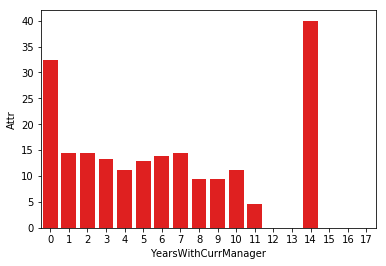

In [79]:
cross25 = pd.crosstab(index = dataset['YearsWithCurrManager'], columns = dataset['Attrition'])
yea = pd.DataFrame(cross25)
yea['Attr'] = (yea[1]/(yea[0]+yea[1]))*100
sns.barplot(x = yea.index, y = yea['Attr'], color = 'red')

### Attrition rates decreases with the increase in years with a manager without change, however as per the data people take decision on 14th year.

## Converting the categorical data using get dummies option

In [81]:
dataset = pd.get_dummies(data = dataset, columns = ['OverTime','MaritalStatus','JobRole','Gender',
                                                    'EducationField','Department','BusinessTravel'], drop_first = True)


In [83]:
dataset.shape

(1470, 45)

### All the data type should be numerical, therefore verifying the same.

In [95]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null int32
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
PercentSalaryHike                    1470 non-null int64
PerformanceRating                    1470 non-null int64
RelationshipSatisfaction             1

### Checking for correlation of the features with the target variable

In [112]:
corr_data = dataset.corr()
corr_data['Attrition'].sort_values(ascending = False)

Attrition                            1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
PercentSalaryHike                   -0.013478
EducationField_Other                -0.017898
Education                           -0.031373
EducationField_Life Sciences      

### Checking for multi-collenearity issue and I do not see any except for one with department sales and jobrole_sales_executive which is 0.81, rest is fine and I'm not removing any columns

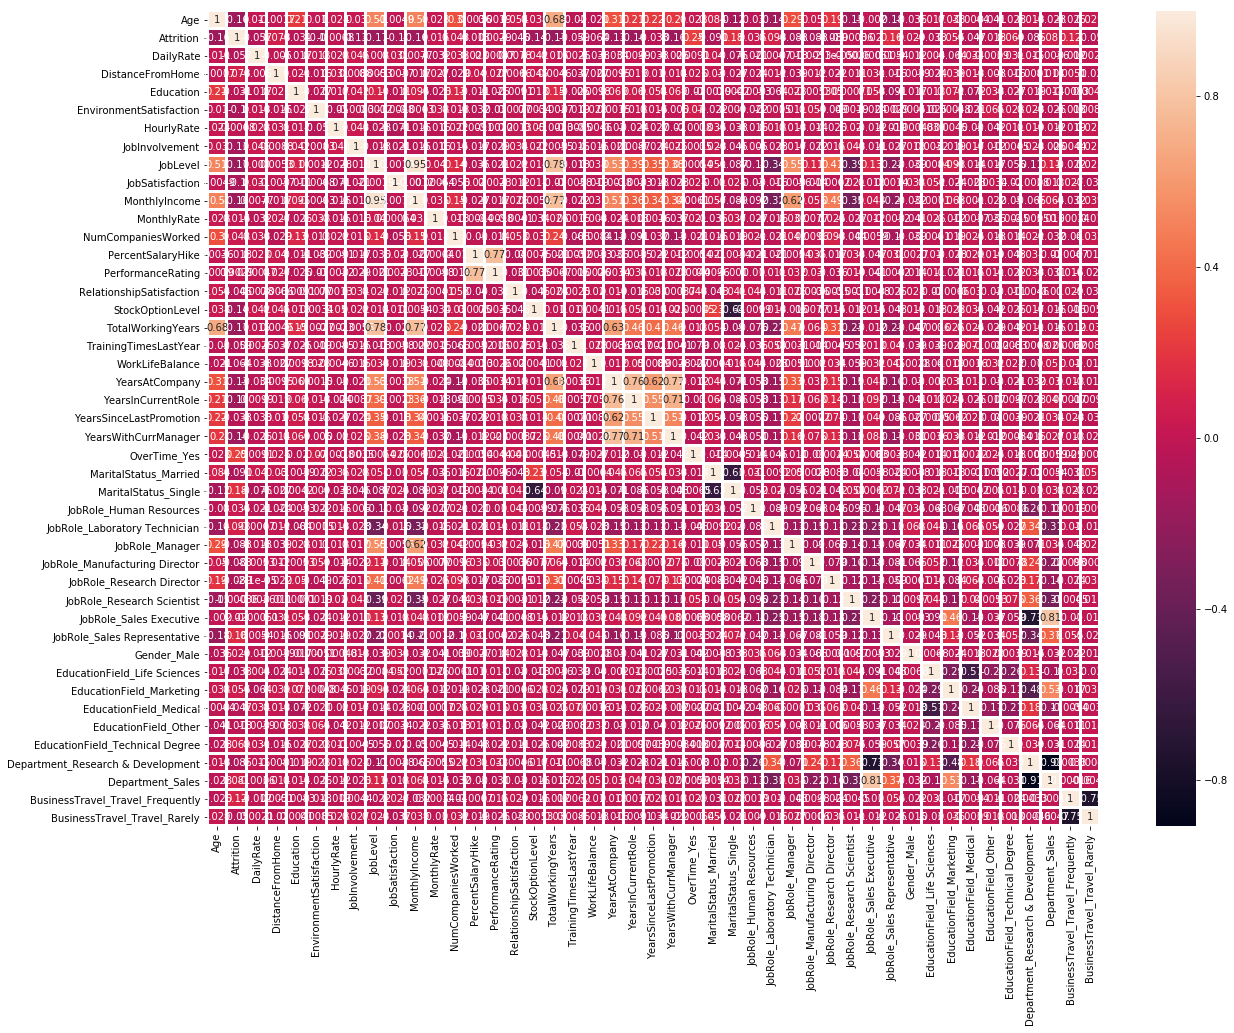

In [113]:
plt.figure(figsize = (20,15))
sns.heatmap(corr_data, annot = True,linewidths=2)

### Checking for outliers on the data and splitting the data to see the outliers clearly

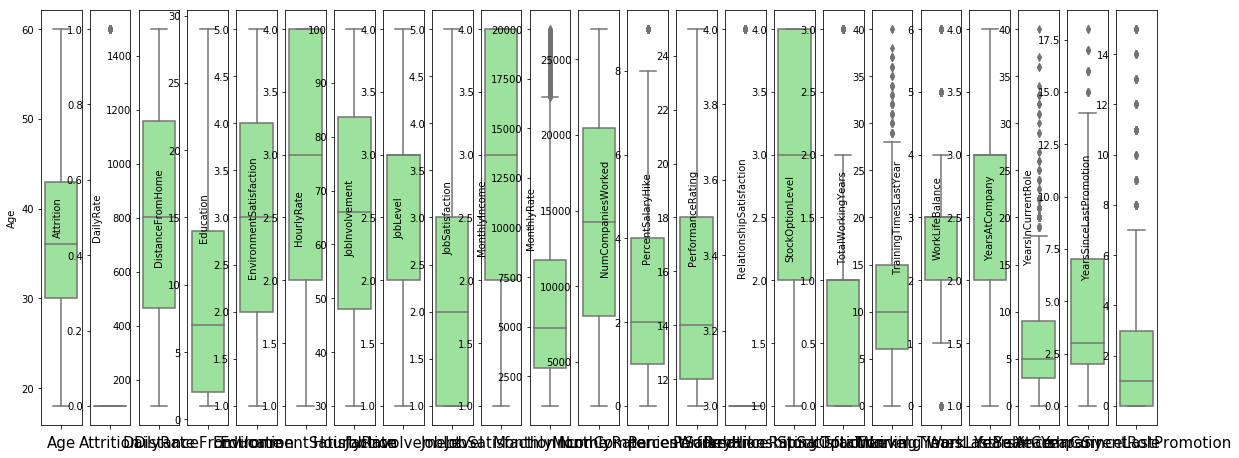

In [99]:
plt.figure(figsize = (20,90))
pltnum = 1
dat = dataset.iloc[:,:23]
for i in dat:
    if pltnum <=230:
        plt.subplot(10,23,pltnum)
        sns.boxplot(dat[i], orient = 'v',color = 'lightgreen')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.show()

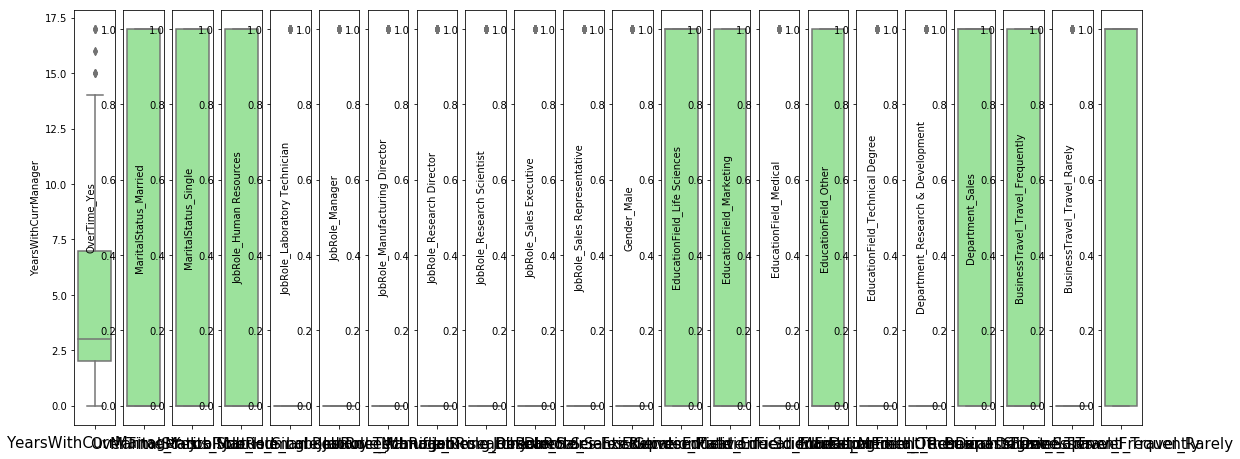

In [100]:
plt.figure(figsize = (20,90))
pltnum = 1
dat = dataset.iloc[:,23:]
for i in dat:
    if pltnum <=230:
        plt.subplot(10,23,pltnum)
        sns.boxplot(dat[i], orient = 'v',color = 'lightgreen')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.show()

### Upon reviewing, I can see that the column monthly income has outliers. hence removing the same.

In [102]:
from scipy.stats import zscore
z =np.abs(zscore(dataset[['MonthlyIncome']]))
z

array([[0.10834951],
       [0.29171859],
       [0.93765369],
       ...,
       [0.07669019],
       [0.23647414],
       [0.44597809]])

In [108]:
out_data = dataset[(z<2.0).all(axis = 1)]
print(out_data.shape)
print(dataset.shape)

(1342, 45)
(1470, 45)


### We can see that there is 8-9 % data loss and I'm willing to remove the same

In [110]:
(1342/1470)*100

91.29251700680273

### Checking for outliers post removal of outliers

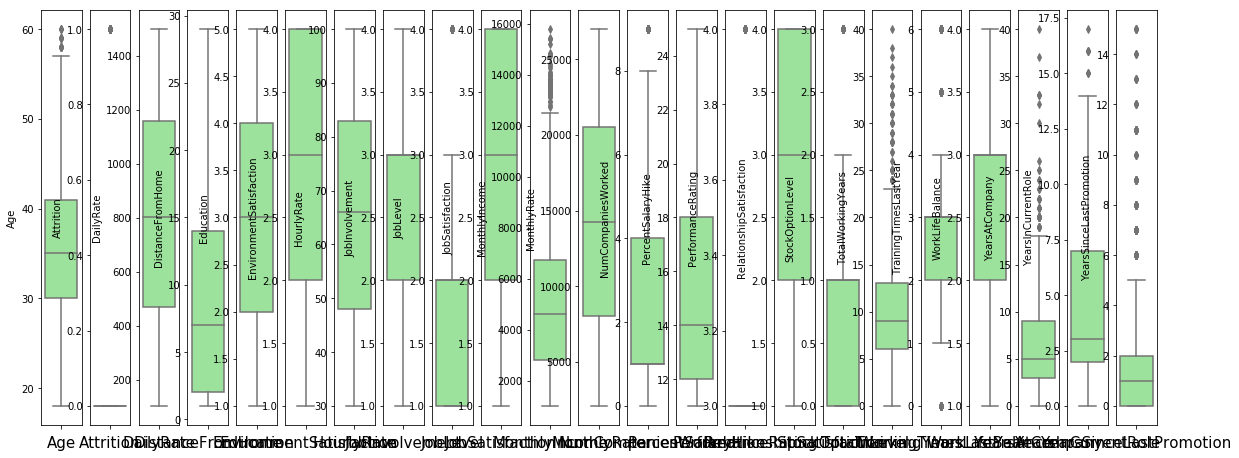

In [111]:
plt.figure(figsize = (20,90))
pltnum = 1
dat = out_data.iloc[:,:23]
for i in dat:
    if pltnum <=230:
        plt.subplot(10,23,pltnum)
        sns.boxplot(dat[i], orient = 'v',color = 'lightgreen')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.show()

### Checking for data sistribution to check skewness for the continuous data columns

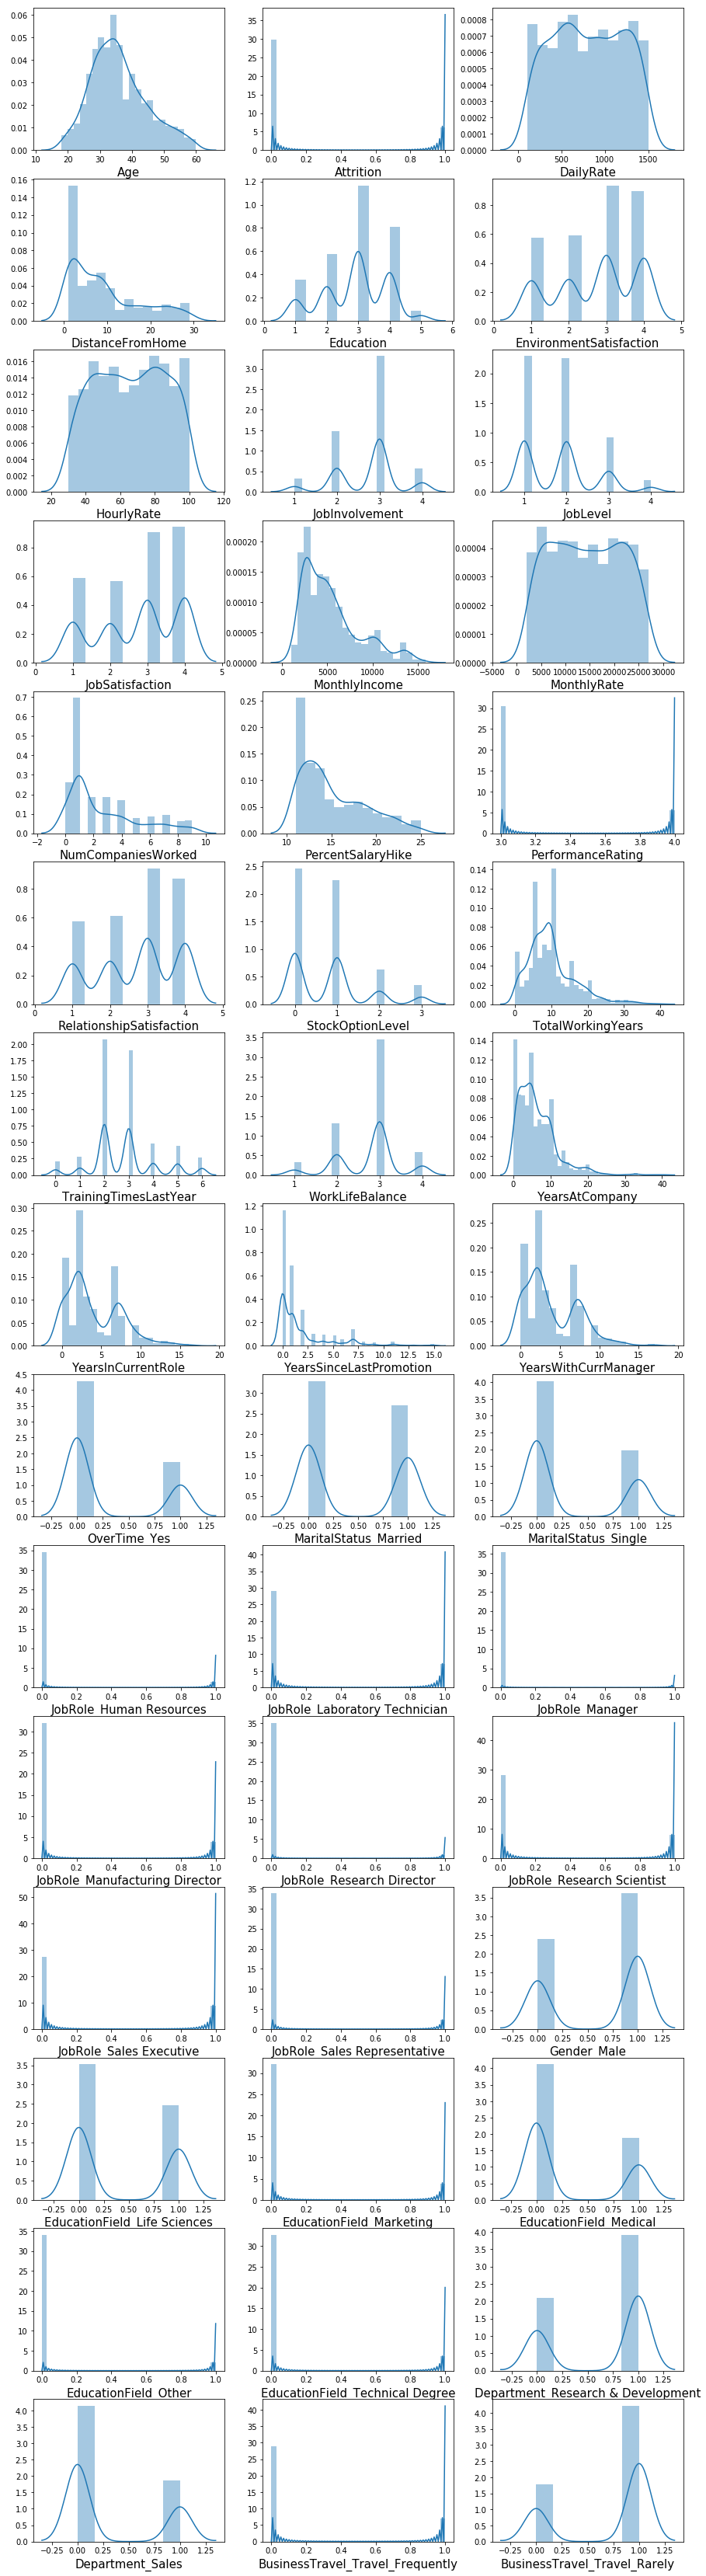

In [117]:
plt.figure(figsize=(15,60))
pltnum = 1
for i in out_data:
    if pltnum<=45:
        plt.subplot(15,3,pltnum)
        sns.distplot(out_data[i])
        plt.xlabel(i,fontsize = 15)
    pltnum+=1
plt.show()
    

### Checking for skewness

In [118]:
out_data.skew()

Age                                  0.538837
Attrition                            1.732108
DailyRate                           -0.002075
DistanceFromHome                     0.927793
Education                           -0.299836
EnvironmentSatisfaction             -0.318042
HourlyRate                          -0.033169
JobInvolvement                      -0.477359
JobLevel                             0.705440
JobSatisfaction                     -0.337362
MonthlyIncome                        1.106764
MonthlyRate                          0.021927
NumCompaniesWorked                   1.069293
PercentSalaryHike                    0.804631
PerformanceRating                    1.924625
RelationshipSatisfaction            -0.294004
StockOptionLevel                     0.967165
TotalWorkingYears                    1.233610
TrainingTimesLastYear                0.548797
WorkLifeBalance                     -0.566946
YearsAtCompany                       1.731641
YearsInCurrentRole                

### Splitting x and y data to apply transformation on the independent variables

In [119]:
x = out_data.drop(columns = 'Attrition')
y = out_data['Attrition']

In [120]:
tr = power_transform(x,method = 'yeo-johnson')
x = pd.DataFrame(tr, columns = x.columns)

### We can see that the skewness is controlled on continuous features let's look at te distribution again

In [121]:
x.skew()

Age                                 -0.001684
DailyRate                           -0.195319
DistanceFromHome                    -0.017402
Education                           -0.104947
EnvironmentSatisfaction             -0.201795
HourlyRate                          -0.105839
JobInvolvement                      -0.023609
JobLevel                             0.078719
JobSatisfaction                     -0.215486
MonthlyIncome                        0.011116
MonthlyRate                         -0.182450
NumCompaniesWorked                   0.022383
PercentSalaryHike                    0.112426
PerformanceRating                    1.924625
RelationshipSatisfaction            -0.191855
StockOptionLevel                     0.094724
TotalWorkingYears                    0.004516
TrainingTimesLastYear                0.055923
WorkLifeBalance                     -0.013876
YearsAtCompany                      -0.013843
YearsInCurrentRole                  -0.062197
YearsSinceLastPromotion           

### verifing the distribution post outlier removal and data transformation

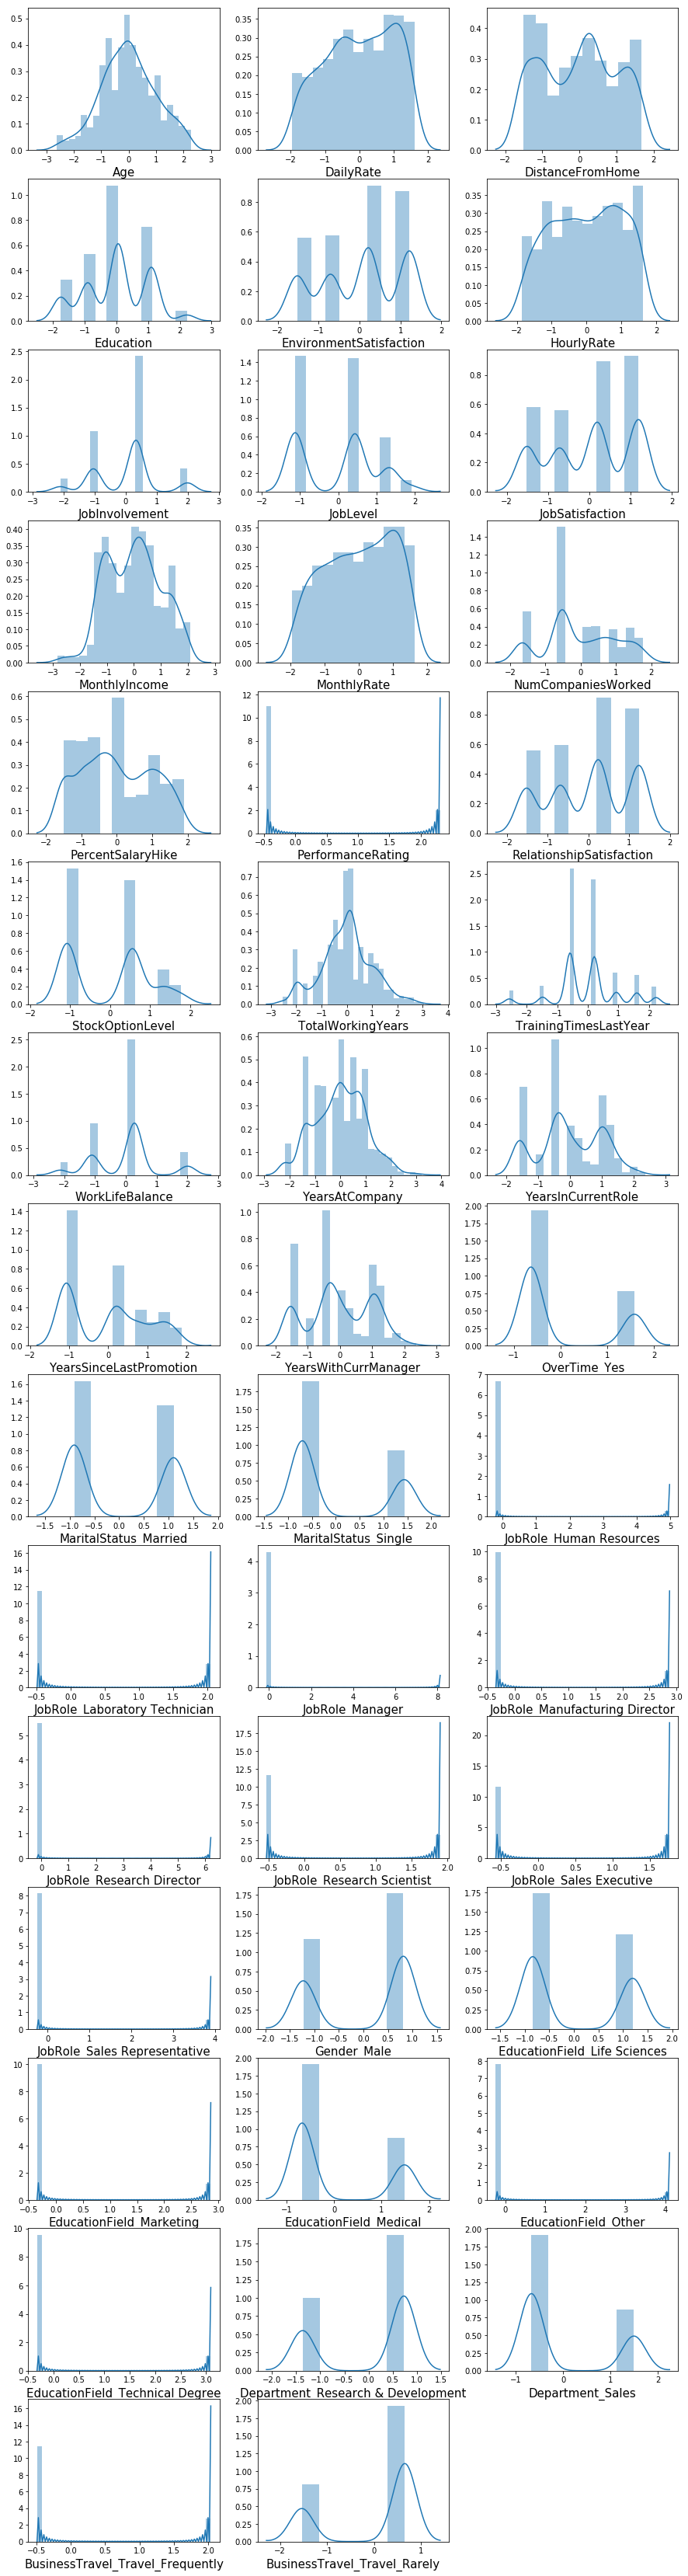

In [122]:
plt.figure(figsize=(15,60))
pltnum = 1
for i in x:
    if pltnum<=45:
        plt.subplot(15,3,pltnum)
        sns.distplot(x[i])
        plt.xlabel(i,fontsize = 15)
    pltnum+=1
plt.show()

## Checking for outliers again

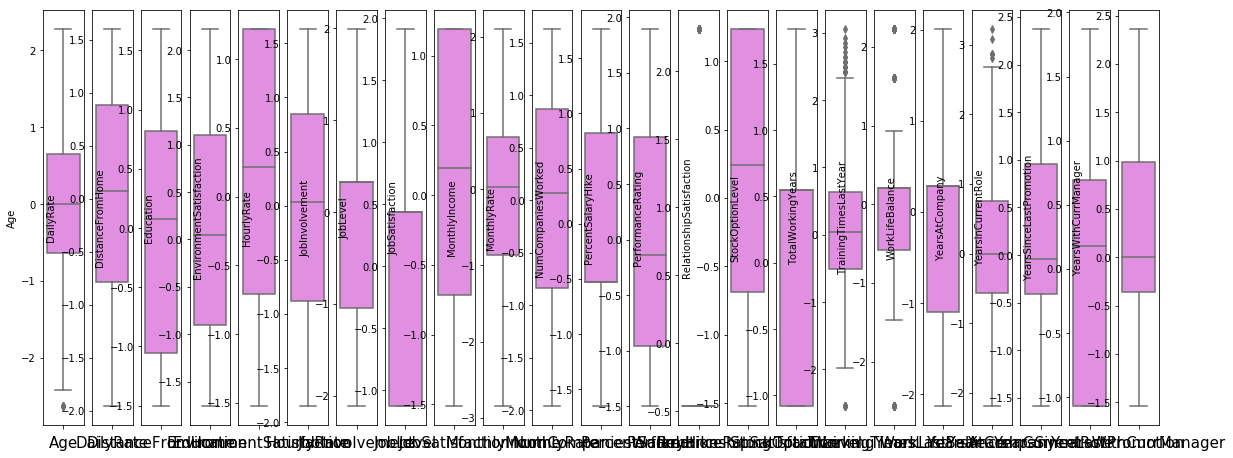

In [123]:
plt.figure(figsize = (20,90))
pltnum = 1
dat = x.iloc[:,:23]
for i in dat:
    if pltnum <=230:
        plt.subplot(10,23,pltnum)
        sns.boxplot(dat[i], orient = 'v',color = 'violet')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.show()

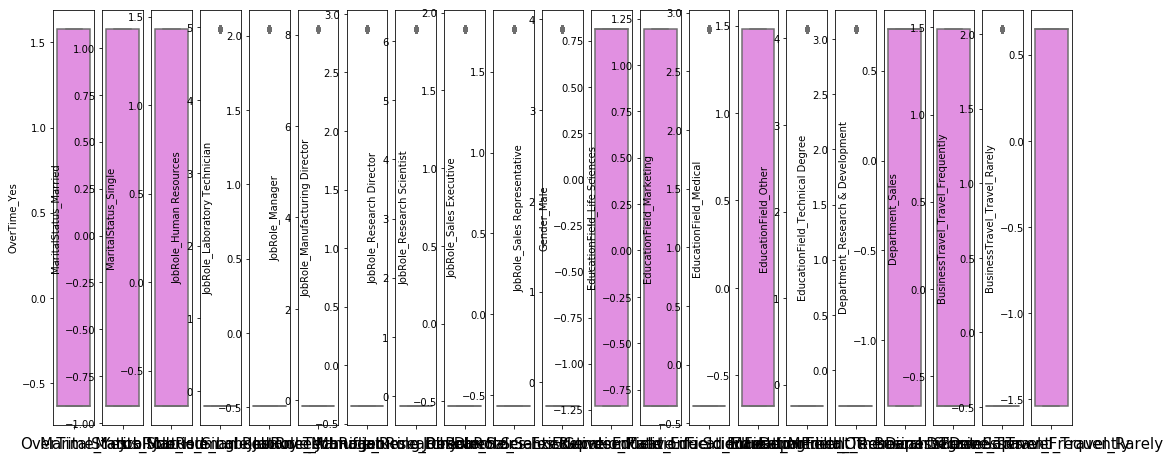

In [125]:
plt.figure(figsize = (20,90))
pltnum = 1
dat = x.iloc[:,23:]
for i in dat:
    if pltnum <=230:
        plt.subplot(10,23,pltnum)
        sns.boxplot(dat[i], orient = 'v',color = 'violet')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.show()

In [127]:
y.value_counts()

0    1110
1     232
Name: Attrition, dtype: int64

### Upon reviewing the classes I can see that there is a class imbalance issue, therefore using SMOTE to handle the class imbalance

In [128]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_over,y_over = sm.fit_resample(x,y)

In [129]:
y_over.value_counts()

1    1110
0    1110
Name: Attrition, dtype: int64

### We can see that the class imbalance issue is fixed

### Outlier removal was successful, there aren't many outliers now, therefore I'm proceeding with model building

## Finding the best random state

In [131]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
for i in range(0,3000):
    x_train,x_test, y_train,y_test = train_test_split(x_over,y_over,test_size = 0.3, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train,y_train)
    ts_pred = lg.predict(x_test)
    tr_pred = lg.predict(x_train)
    ts_score = accuracy_score(y_test,ts_pred)
    tr_score = accuracy_score(y_train, tr_pred)
    if round(ts_score*100,1) == round(tr_score*100,1):
        rs = i
print('the best random state for the data set is', i)
    

the best random state for the data set is 2999


### Spitting the dataset

In [132]:
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over, test_size = 0.3, random_state = 2999)

## Model 1 LogisticRegression

In [134]:
log = LogisticRegression()
log.fit(x_train,y_train)
log_pred = log.predict(x_test)
log_score = accuracy_score(y_test,log_pred)
log_score

0.8153153153153153

## Model 2 Random Forest Classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_score = accuracy_score(y_test, rf_pred)
rf_score

0.9309309309309309

## Model 3 KNeighbors Classifier

In [137]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_score = accuracy_score(y_test,knn_pred)
knn_score

0.7747747747747747

## Model 4 Extra Trees Classifier

In [139]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
et_pred = et.predict(x_test)
et_score = accuracy_score(y_test, et_pred)
et_score

0.9534534534534534

## Model 5 XGBoost Classifier

In [143]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric = 'logloss')
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)
xgb_score = accuracy_score(y_test,xgb_pred)
xgb_score

0.9204204204204204

## Using cross-validation to find the best model

In [144]:
cv = cross_val_score(log,x_over,y_over,cv =7)
cv = cv.mean()
cv

0.8036157144841152

In [145]:
cv1 = cross_val_score(rf,x_over,y_over,cv =7)
cv1 = cv1.mean()
cv1

0.935217858347434

In [146]:
cv2 = cross_val_score(knn,x_over,y_over,cv =7)
cv2 = cv2.mean()
cv2

0.7982149588601585

In [147]:
cv3 = cross_val_score(et,x_over,y_over,cv =7)
cv3 = cv3.mean()
cv3

0.965342199018766

In [148]:
cv4 = cross_val_score(xgb,x_over,y_over,cv =7)
cv4 = cv4.mean()
cv4

0.9203760547132965

## Selecting the best model

In [149]:
mod = [log_score,rf_score,knn_score,et_score,xgb_score]
cv = [cv,cv1,cv2,cv3,cv4]
model =  pd.DataFrame({})
model['mod']  = mod
model['cv'] = cv
model['diff']  = model['mod'] - model['cv']
model

,mod,cv,diff
0,0.815315,0.803616,0.011700
1,0.930931,0.935218,-0.004287
2,0.774775,0.798215,-0.023440
3,0.953453,0.965342,-0.011889
4,0.920420,0.920376,0.000044


### I can see that the best model here is Extra Trees Classifier. Therefore, I'm proceeding with hyper parameter tuning

In [154]:
params = {'n_estimators':[100,150,200,250,300],
         'max_depth':[10,12,14,16],
         'min_samples_split':[3,4,5,6,7],
         'class_weight':['balanced','balanced_subsample'],
         'n_jobs':[-1,-2,-3,-4],
         }

In [155]:
gcv = GridSearchCV(ExtraTreesClassifier(),params,cv =7)
gcv.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=ExtraTreesClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [10, 12, 14, 16],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 150, 200, 250, 300],
                         'n_jobs': [-1, -2, -3, -4]})

In [156]:
gcv.best_params_

{'class_weight': 'balanced_subsample',
 'max_depth': 16,
 'min_samples_split': 3,
 'n_estimators': 200,
 'n_jobs': -1}

In [157]:
et = ExtraTreesClassifier(class_weight= 'balanced_subsample',max_depth = 16,min_samples_split = 3, n_estimators = 200, n_jobs =-1)
et.fit(x_train,y_train)
fn_pred = et.predict(x_test)
fn_score = accuracy_score(y_test, fn_pred)
fn_score

0.948948948948949

## From the below classification report we can see that we have achieved f1 score of 0.95

In [159]:
print(classification_report(y_test,fn_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       329
           1       0.94      0.96      0.95       337

    accuracy                           0.95       666
   macro avg       0.95      0.95      0.95       666
weighted avg       0.95      0.95      0.95       666



In [160]:
auc = roc_auc_score(y_test,fn_pred)
auc

0.9488333498687688

## We also received the AUC score of 0.95 using Extra Trees

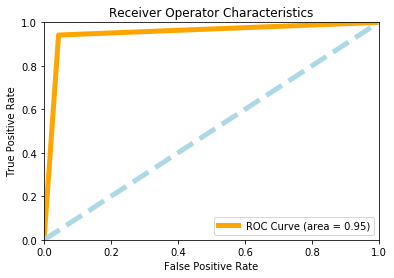

In [165]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(fn_pred, y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr, lw = 5, color = 'orange', label = 'ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color = 'lightblue',lw=5, linestyle = '--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operator Characteristics')
plt.legend(loc = 'lower right')
plt.show()

## Therefore saving the model

In [166]:
import joblib
joblib.dump(et,'HR-Analytics.pkl')

['HR-Analytics.pkl']